In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [30]:
aapl = pd.read_csv("AAPL_CLOSE", index_col="Date", parse_dates=True)
amzn = pd.read_csv("AMZN_CLOSE", index_col="Date", parse_dates=True)
cisco = pd.read_csv("CISCO_CLOSE", index_col="Date", parse_dates=True)
ibm = pd.read_csv("IBM_CLOSE", index_col="Date", parse_dates=True)

In [31]:
stock_list = [aapl,amzn,cisco,ibm]
stock_d = {"AAPL":aapl, "AMZN":amzn, "CISCO":cisco, "IBM":ibm}

## Cumulative Daily Returns

This is found by dividing each day's price by the first day. This gives the cumulative returns for each day. 

In [32]:
for stock in stock_list:
    stock["Normed Return"] = stock["Adj. Close"] / stock.iloc[0]["Adj. Close"]

In [33]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,53.063218,1.000000
2012-01-04,53.348386,1.005374
2012-01-05,53.940658,1.016536
2012-01-06,54.504543,1.027162
2012-01-09,54.418089,1.025533


## Creating allocation

In [34]:
allocations = [0.3,0.1,0.2,0.4]

In [35]:
for stock, alloc in zip(stock_list,allocations):
    stock["Allocation"] = stock["Normed Return"] * alloc
    stock["Position Values"] = stock["Allocation"] * 1000000

In [36]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [37]:
all_pos_val = pd.concat([aapl["Position Values"],amzn["Position Values"],cisco["Position Values"],ibm["Position Values"]],axis=1)
all_pos_val.columns = ["AAPL_POS","AMZN_POS","CISCO_POS","IBM_POS"]
all_pos_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS
Date,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583


In [38]:
all_pos_val["Total Pos"] = all_pos_val.sum(axis=1)
all_pos_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS,Total Pos
Date,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296,1.002996e+06
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638,1.003760e+06
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463,1.004437e+06
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583,1.000935e+06


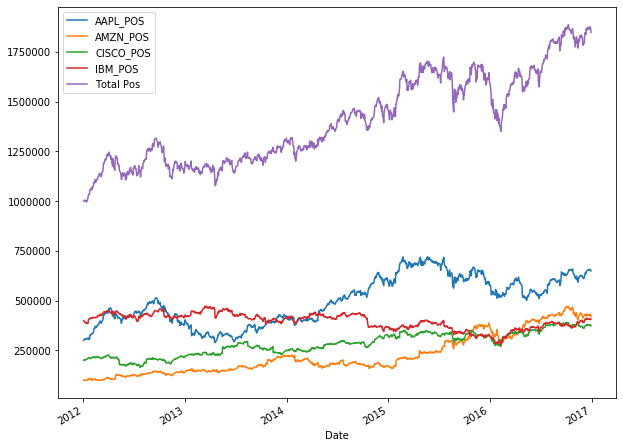

In [39]:
all_pos_val.plot(figsize=(10,8))

In [40]:
portfolio_val = all_pos_val
portfolio_val["Daily Return"] = portfolio_val["Total Pos"].pct_change(1)
portfolio_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296,1.002996e+06,0.002996
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638,1.003760e+06,0.000761
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463,1.004437e+06,0.000675
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583,1.000935e+06,-0.003487


In [41]:
portfolio_val["Daily Return"].mean()

0.0005442330716215299

In [42]:
portfolio_val["Daily Return"].std()

0.010568287769162552

## SHARPE RATIO

In [43]:
SR = portfolio_val["Daily Return"].mean() / portfolio_val["Daily Return"].std()
SR

0.05149680662647737

In [44]:
ASR = (252 ** 0.5) * SR # Annualised Sharpe ratio
ASR

0.8174864618858532

## Optimization

### Monte Carlo Simulation

In [46]:
aapl = pd.read_csv("AAPL_CLOSE", index_col="Date", parse_dates=True)
amzn = pd.read_csv("AMZN_CLOSE", index_col="Date", parse_dates=True)
cisco = pd.read_csv("CISCO_CLOSE", index_col="Date", parse_dates=True)
ibm = pd.read_csv("IBM_CLOSE", index_col="Date", parse_dates=True)

In [48]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ["aapl","cisco","ibm","amzn"]

In [49]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [50]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [52]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [56]:
log_ret = np.log(stocks/stocks.shift(1))

In [57]:
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


In [58]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [60]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [111]:
np.random.seed(101)
print(stocks.columns)

print("\nRandom wights")
weights = np.array(np.random.random(4))
print(weights)

print("\nRebalanced weights")
weights = weights/sum(weights)
print(weights)

print("\nExpected returns")
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)

print("\nVolatility")
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)

print("\nSharpe Ratio")
sr = exp_ret/exp_vol
print(sr)
print(type(sr))

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')

Random wights
[0.51639863 0.57066759 0.02847423 0.17152166]

Rebalanced weights
[0.40122278 0.44338777 0.02212343 0.13326603]

Expected returns
0.15599272049632004

Volatility
0.18502649565909488

Sharpe Ratio
0.8430831483926032
<class 'numpy.float64'>


In [119]:
np.random.seed(101)
count = 5000

weights_arr = np.zeros((count,len(stocks.columns)))
ret_arr = np.zeros(count)
vol_arr = np.zeros(count)
sr_arr = np.zeros(count)

for ind in range(count):

    w = np.array(np.random.random(4))
    weights_arr[ind] = w/sum(w)
    ret_arr[ind] = np.sum((log_ret.mean() * weights_arr[ind] ) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights_arr[ind].T, np.dot(log_ret.cov() * 252, weights_arr[ind])))
    sr_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [122]:
print("Max SR")
print(sr_arr[1420])

print("\nCorresponding Return: {}".format(ret_arr[1420]))
print("\nCorresponding Volatility: {}".format(vol_arr[1420]))
print("\nCorrespondng")

Max SR
1.0303260551271067

Corresponding Return: 0.21857805695172433

Corresponding Volatility: 0.2121445496442962


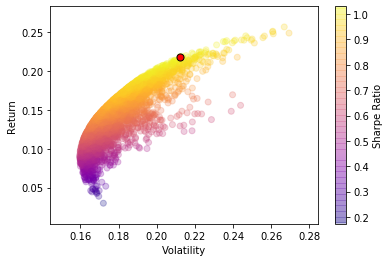

In [130]:
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap="plasma",alpha=0.25)
plt.plot(figsize=(10,8))
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.colorbar(label="Sharpe Ratio")

plt.scatter(vol_arr[1420],ret_arr[1420],s=50,c="red",edgecolors="black")

### Mathematical Optimization

In [131]:
from scipy.optimize import minimize

In [132]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [149]:
def get_ret_vol_sr(wei):
    wei = np.array(wei)
    ret = np.sum((log_ret.mean() * 252) * wei)
    vol = np.sqrt(np.dot(wei.T, np.dot(log_ret.cov() * 252, wei)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [ ]:
minimize()

In [150]:
def negative_sr(weig):
    return get_ret_vol_sr(weig)[2] * -1

In [151]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [152]:
def check_sum(weights):
    # returns 0 if the weights add up to 1
    return np.sum(weights) - 1

In [153]:
cons = ({"type":"eq","fun":check_sum})

In [154]:
init_guess = [0.25,0.25,0.25,0.25]

In [155]:
opt_results = minimize(negative_sr,init_guess,method="SLSQP",bounds=bounds,constraints=cons)

In [156]:
opt_results

     fun: -1.030716870334769
     jac: array([ 5.64306974e-05,  4.18573618e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289777e-01, 2.04189822e-01, 8.40256684e-17, 5.29520401e-01])

In [157]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [158]:
frontier_y = np.linspace(0,0.3,100)

In [160]:
def min_volatility(weigh):
    return get_ret_vol_sr(weigh)[1]

In [161]:
frontier_vol = []

for possible_ret in frontier_y:
    constr = ({"type":"eq","fun":check_sum},
            {"type":"eq","fun": lambda w: get_ret_vol_sr(w)[0] - possible_ret})
    results = minimize(min_volatility,init_guess,method="SLSQP",bounds=bounds,constraints=constr)
    frontier_vol.append(results["fun"])

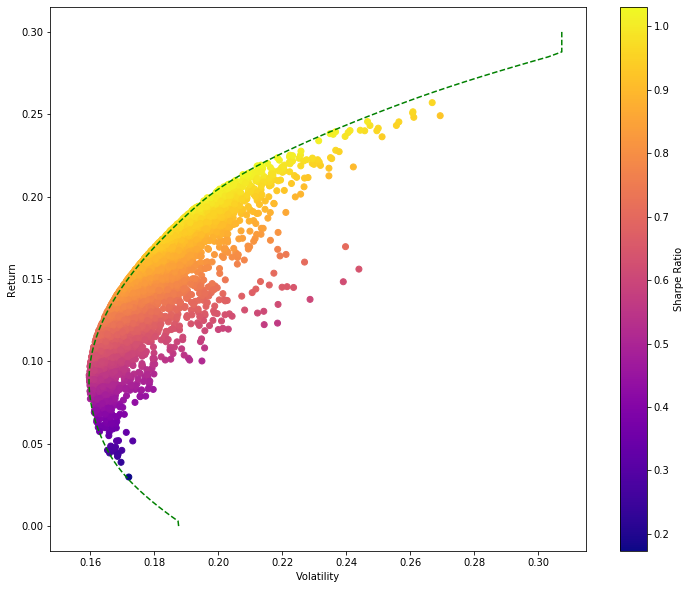

In [168]:
plt.figure(figsize=(12,10))
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap="plasma")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.colorbar(label="Sharpe Ratio")

plt.plot(frontier_vol,frontier_y,"g--")